In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sl
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import r2_score

In [2]:
df_games = pd.read_csv('game_sales.csv')

In [3]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
df_games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df_games.shape
print("There are " + str(len(df_games)) + ' games recorded in the dataset.')
print("There are " + str(len(df_games.columns)) + ' features of those games.')

There are 16598 games recorded in the dataset.
There are 11 features of those games.


In [6]:
# Let's drop the Rank column because we won't use it.
df_games.drop(columns="Rank",inplace=True)
df_games.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
# Checking if we have missing values
print(df_games.isnull().sum().sort_values(ascending=False))

Year            271
Publisher        58
Name              0
Platform          0
Genre             0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [8]:
df_games = df_games.dropna() #Dropped missing values, because they are not that much
df_games.shape

(16291, 10)

In [9]:
# We realized that 'Year' features type is float. So we wanted to change its type to int32
df_games["Year"] = df_games["Year"].astype("int32")
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16291 non-null  object 
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  int32  
 3   Genre         16291 non-null  object 
 4   Publisher     16291 non-null  object 
 5   NA_Sales      16291 non-null  float64
 6   EU_Sales      16291 non-null  float64
 7   JP_Sales      16291 non-null  float64
 8   Other_Sales   16291 non-null  float64
 9   Global_Sales  16291 non-null  float64
dtypes: float64(5), int32(1), object(4)
memory usage: 1.3+ MB


# EXPLORING THE DATASET

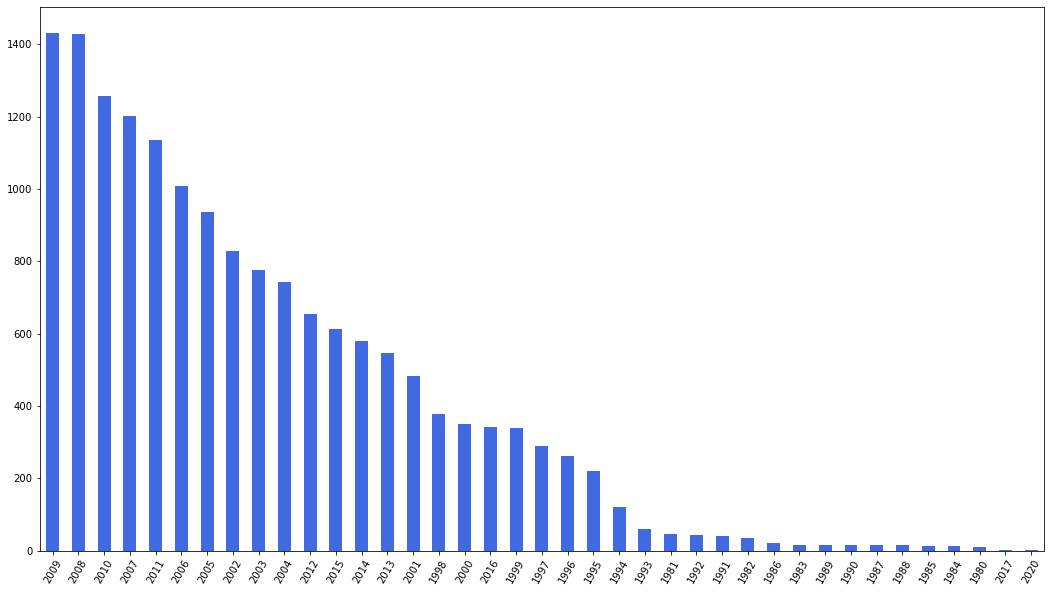

In [10]:
#Yıllara göre çıkan oyun sayısı
f, ax = plt.subplots(figsize=(18,10))
df_games['Year'].value_counts().plot(kind="bar", rot=60, color = "royalblue");

#Yılları sıralayarak çıktı almaya çalış

In [11]:
df_games['Genre'].nunique()
# We have 12 different genres.

12

Text(0, 0.5, '')

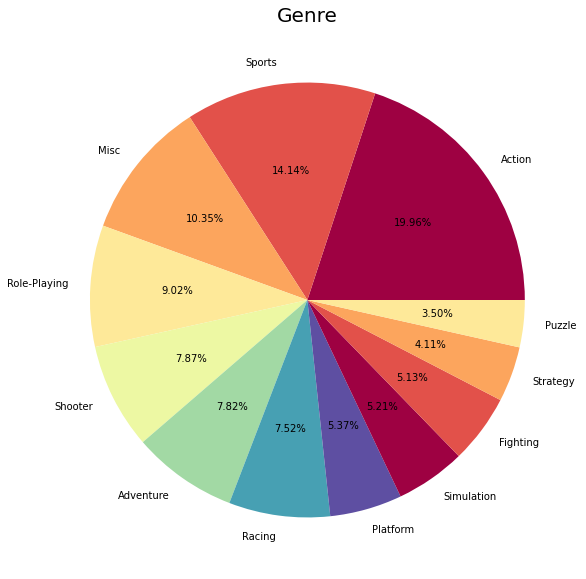

In [12]:
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.figure(figsize=(10,10))
df_games.Genre.value_counts().plot(kind = 'pie', autopct = "%.2f%%", colors = colors)
plt.title('Genre', color = 'black',fontsize = 20);
plt.ylabel("")

In [13]:
df_games['Platform'].nunique()
# We have 31 different platforms.

31

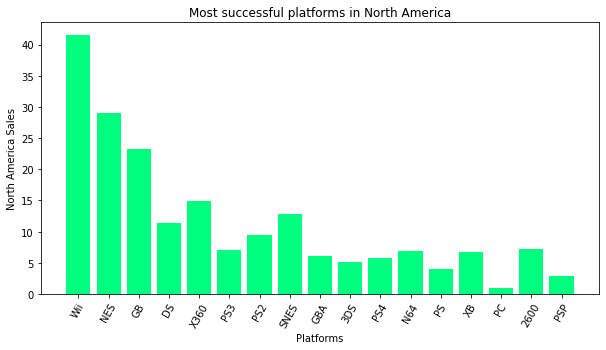

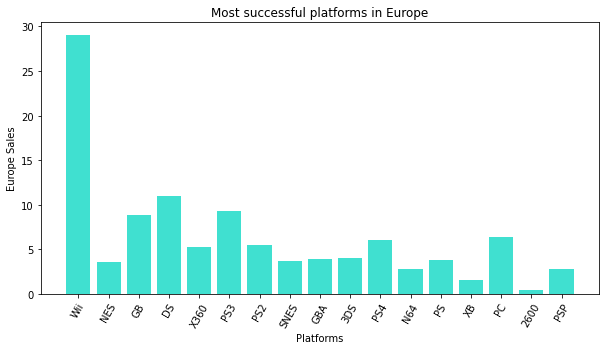

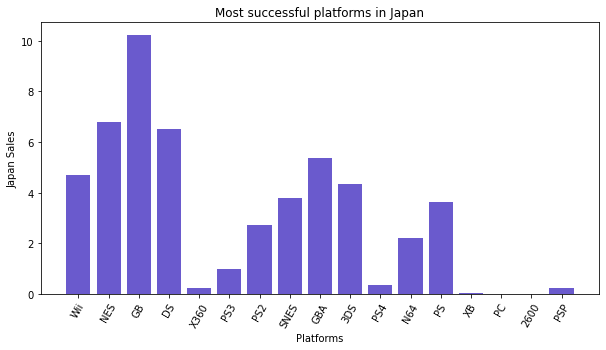

In [14]:
f, ax = plt.subplots(figsize=(10,5))
plt.bar(data=df_games.head(100), x='Platform', height='NA_Sales', color = 'springgreen')
plt.xticks(rotation=60)
plt.xlabel('Platforms')
plt.ylabel('North America Sales')
plt.title('Most successful platforms in North America')
plt.show()

f, ax = plt.subplots(figsize=(10,5))
plt.bar(data=df_games.head(100), x='Platform', height='EU_Sales', color = 'turquoise')
plt.xticks(rotation=60)
plt.xlabel('Platforms')
plt.ylabel('Europe Sales')
plt.title('Most successful platforms in Europe')
plt.show()

f, ax = plt.subplots(figsize=(10,5))
plt.bar(data=df_games.head(100), x='Platform', height='JP_Sales', color = 'slateblue')
plt.xticks(rotation=60)
plt.xlabel('Platforms')
plt.ylabel('Japan Sales')
plt.title('Most successful platforms in Japan')
plt.show()


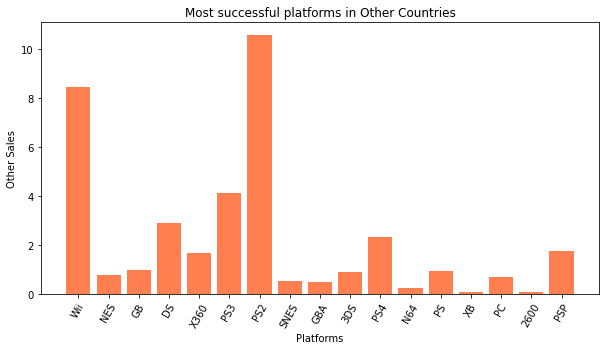

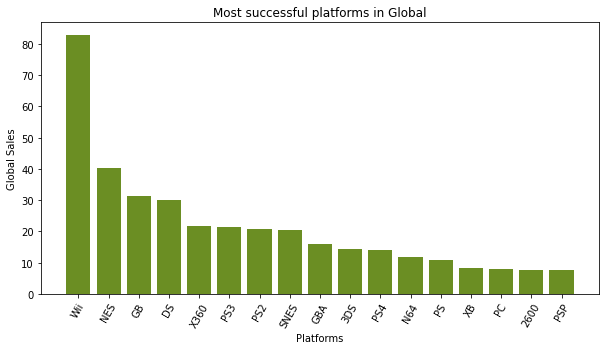

In [15]:
f, ax = plt.subplots(figsize=(10,5))
plt.bar(data=df_games.head(100), x='Platform', height='Other_Sales', color = 'coral')
plt.xticks(rotation=60)
plt.xlabel('Platforms')
plt.ylabel('Other Sales')
plt.title('Most successful platforms in Other Countries')
plt.show()

f, ax = plt.subplots(figsize=(10,5))
plt.bar(data=df_games.head(100), x='Platform', height='Global_Sales', color = 'olivedrab')
plt.xticks(rotation=60)
plt.xlabel('Platforms')
plt.ylabel('Global Sales')
plt.title('Most successful platforms in Global')
plt.show()

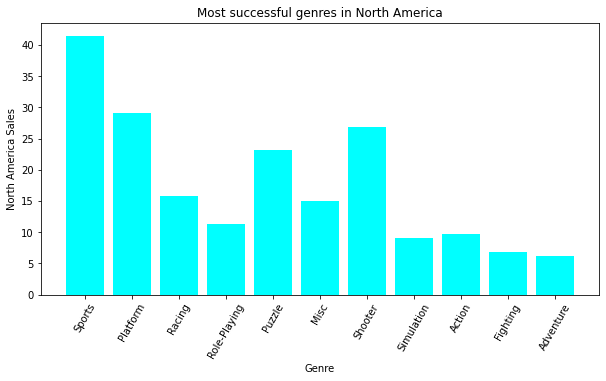

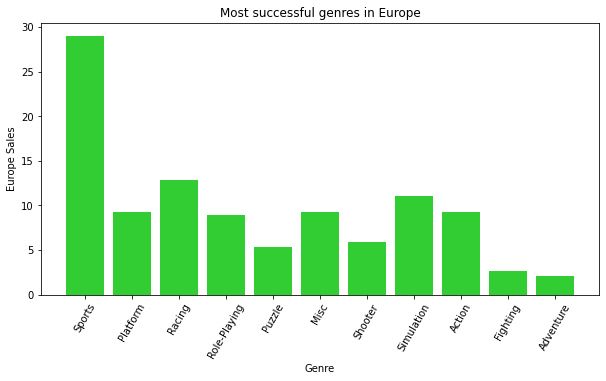

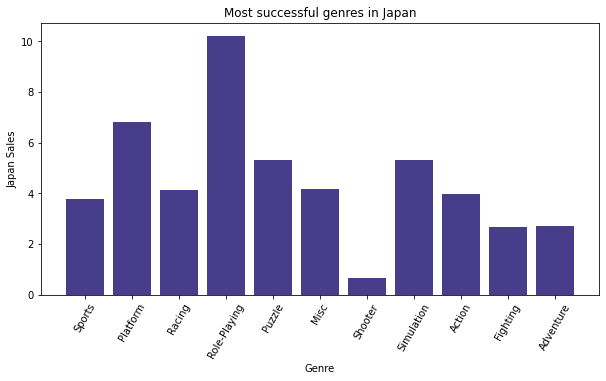

In [16]:
f, ax = plt.subplots(figsize=(10,5))
plt.bar(data=df_games.head(100), x='Genre', height='NA_Sales', color = 'aqua')
plt.xticks(rotation=60)
plt.xlabel('Genre')
plt.ylabel('North America Sales')
plt.title('Most successful genres in North America')
plt.show()

f, ax = plt.subplots(figsize=(10,5))
plt.bar(data=df_games.head(100), x='Genre', height='EU_Sales', color = 'limegreen')
plt.xticks(rotation=60)
plt.xlabel('Genre')
plt.ylabel('Europe Sales')
plt.title('Most successful genres in Europe')
plt.show()

f, ax = plt.subplots(figsize=(10,5))
plt.bar(data=df_games.head(100), x='Genre', height='JP_Sales', color = 'darkslateblue')
plt.xticks(rotation=60)
plt.xlabel('Genre')
plt.ylabel('Japan Sales')
plt.title('Most successful genres in Japan')
plt.show()

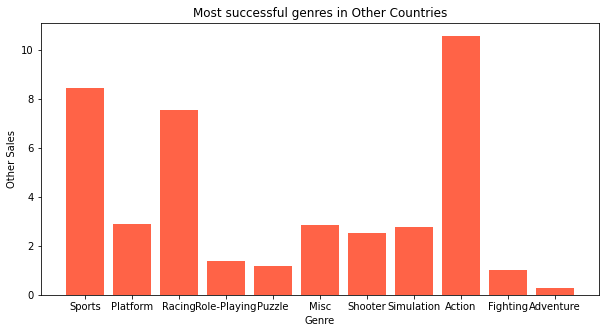

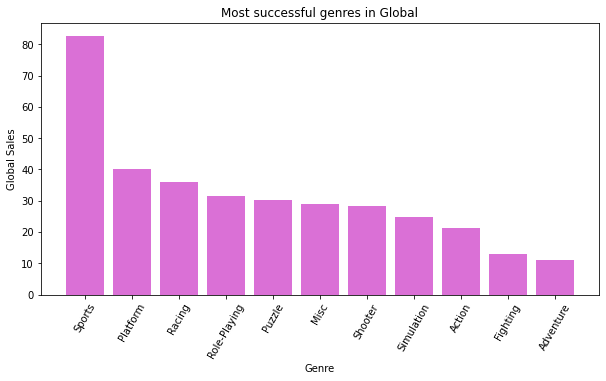

In [17]:
f, ax = plt.subplots(figsize=(10,5))
plt.bar(data=df_games.head(100), x='Genre', height='Other_Sales', color = 'tomato')

plt.xlabel('Genre')
plt.ylabel('Other Sales')
plt.title('Most successful genres in Other Countries')
plt.show()

f, ax = plt.subplots(figsize=(10,5))
plt.bar(data=df_games.head(100), x='Genre', height='Global_Sales', color = 'orchid')
plt.xticks(rotation=60)
plt.xlabel('Genre')
plt.ylabel('Global Sales')
plt.title('Most successful genres in Global')
plt.show()

In [18]:
df_games['Publisher'].nunique()

576

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Electronic Arts'),
  Text(1, 0, 'Activision'),
  Text(2, 0, 'Namco Bandai Games'),
  Text(3, 0, 'Ubisoft'),
  Text(4, 0, 'Konami Digital Entertainment'),
  Text(5, 0, 'THQ'),
  Text(6, 0, 'Nintendo'),
  Text(7, 0, 'Sony Computer Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Take-Two Interactive'),
  Text(10, 0, 'Capcom'),
  Text(11, 0, 'Atari'),
  Text(12, 0, 'Tecmo Koei'),
  Text(13, 0, 'Square Enix'),
  Text(14, 0, 'Warner Bros. Interactive Entertainment'),
  Text(15, 0, 'Disney Interactive Studios'),
  Text(16, 0, 'Eidos Interactive'),
  Text(17, 0, 'Midway Games'),
  Text(18, 0, '505 Games'),
  Text(19, 0, 'Microsoft Game Studios')])

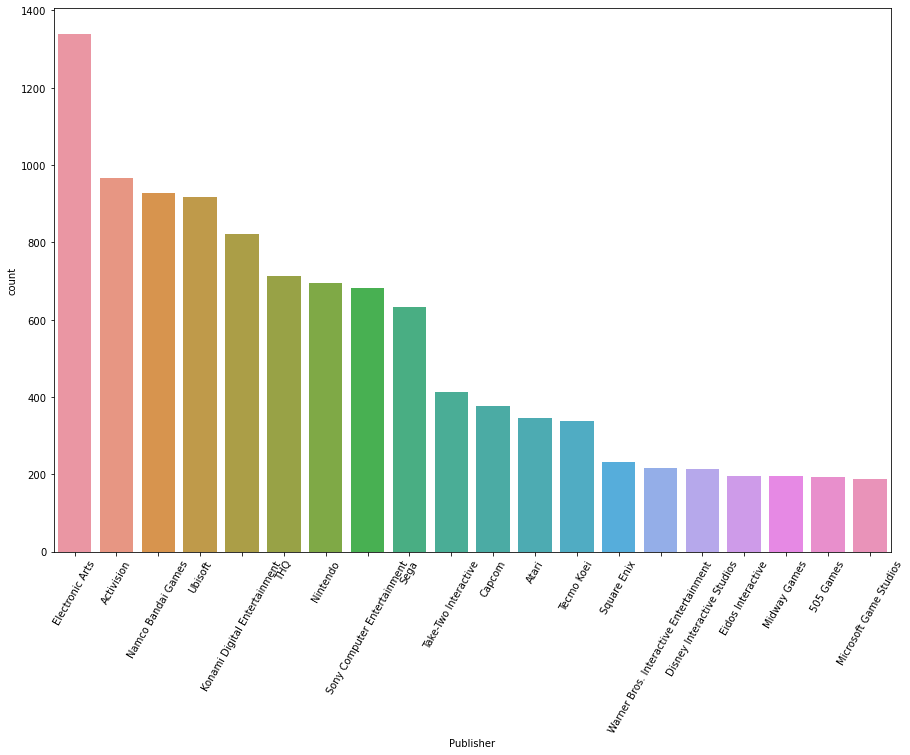

In [19]:
publishers = df_games.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
publishers = pd.DataFrame(publishers).reset_index()
plt.figure(figsize=(15, 10))
ax=sns.countplot(x="Publisher", data=df_games, order = df_games.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=60)

In [20]:
hgs = df_games[['Name','Global_Sales', 'Publisher']].head(20) #highest sales games
hgs
#since the games are ranked by the largest global sales, we will analyze the first 20

,Name,Global_Sales,Publisher
0,Wii Sports,82.74,Nintendo
1,Super Mario Bros.,40.24,Nintendo
2,Mario Kart Wii,35.82,Nintendo
3,Wii Sports Resort,33.00,Nintendo
4,Pokemon Red/Pokemon Blue,31.37,Nintendo
5,Tetris,30.26,Nintendo
6,New Super Mario Bros.,30.01,Nintendo
7,Wii Play,29.02,Nintendo
8,New Super Mario Bros. Wii,28.62,Nintendo
9,Duck Hunt,28.31,Nintendo


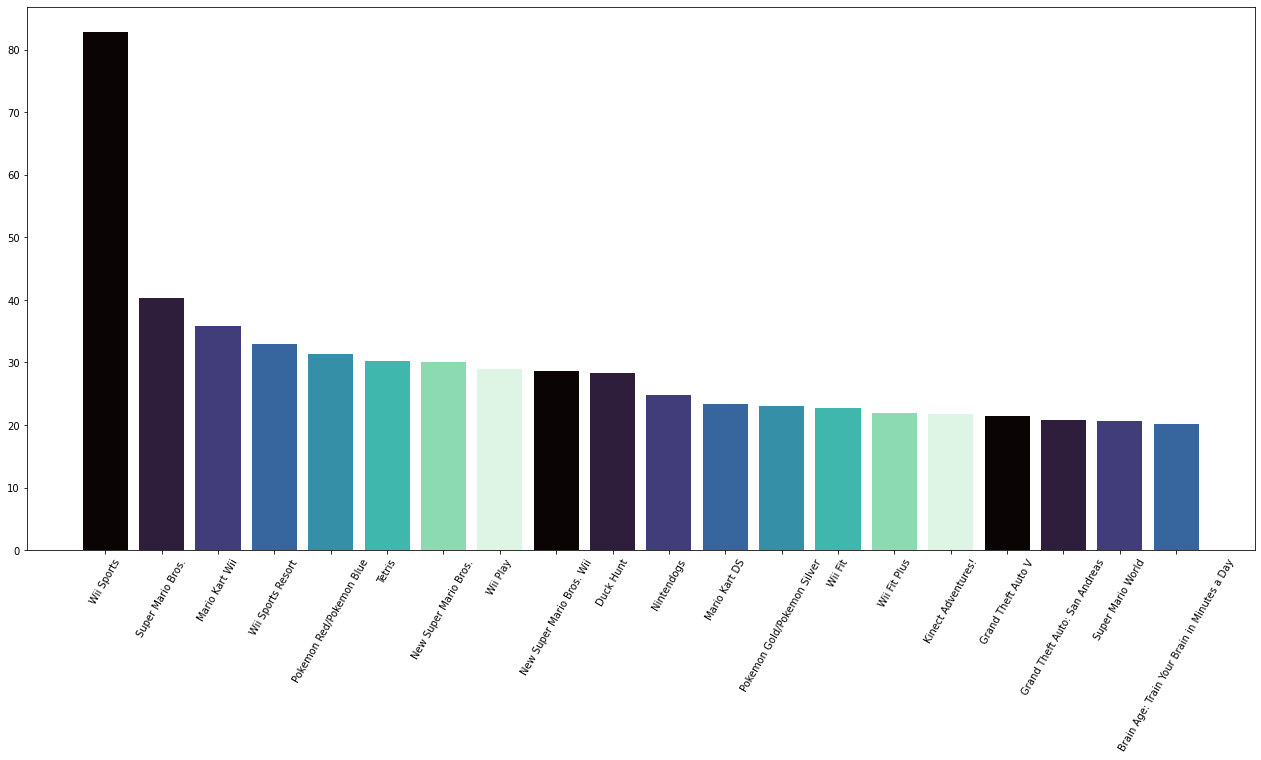

In [21]:
cmap = plt.get_cmap('mako')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.figure(figsize=(22,10))
plt.bar(x='Name', height='Global_Sales', data=hgs, color=colors)
plt.xticks(rotation=60)
plt.show()

Text(0, 0.5, '')

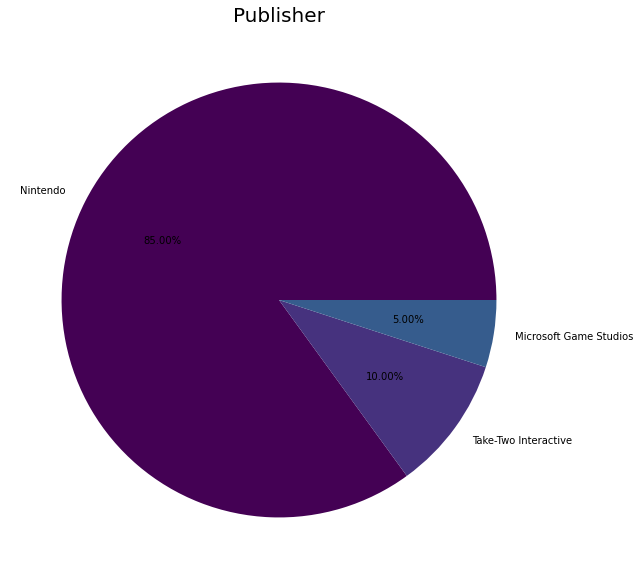

In [22]:
cmap = plt.get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.figure(figsize=(10,10))
hgs.Publisher.value_counts().plot(kind = 'pie', autopct = "%.2f%%", colors = colors)
plt.title('Publisher', color = 'black',fontsize = 20);
plt.ylabel("")


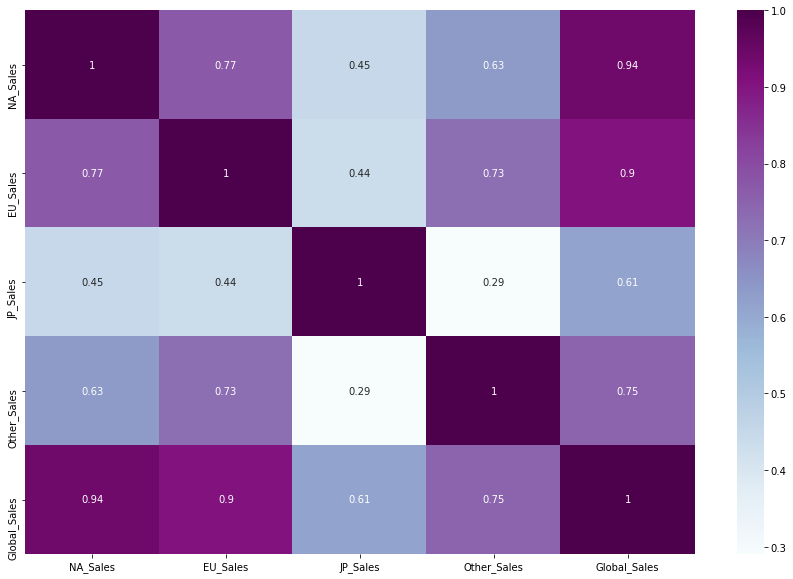

In [23]:
vgdropped = df_games.drop(columns='Year')
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(vgdropped.corr(), annot = True, cmap="BuPu");

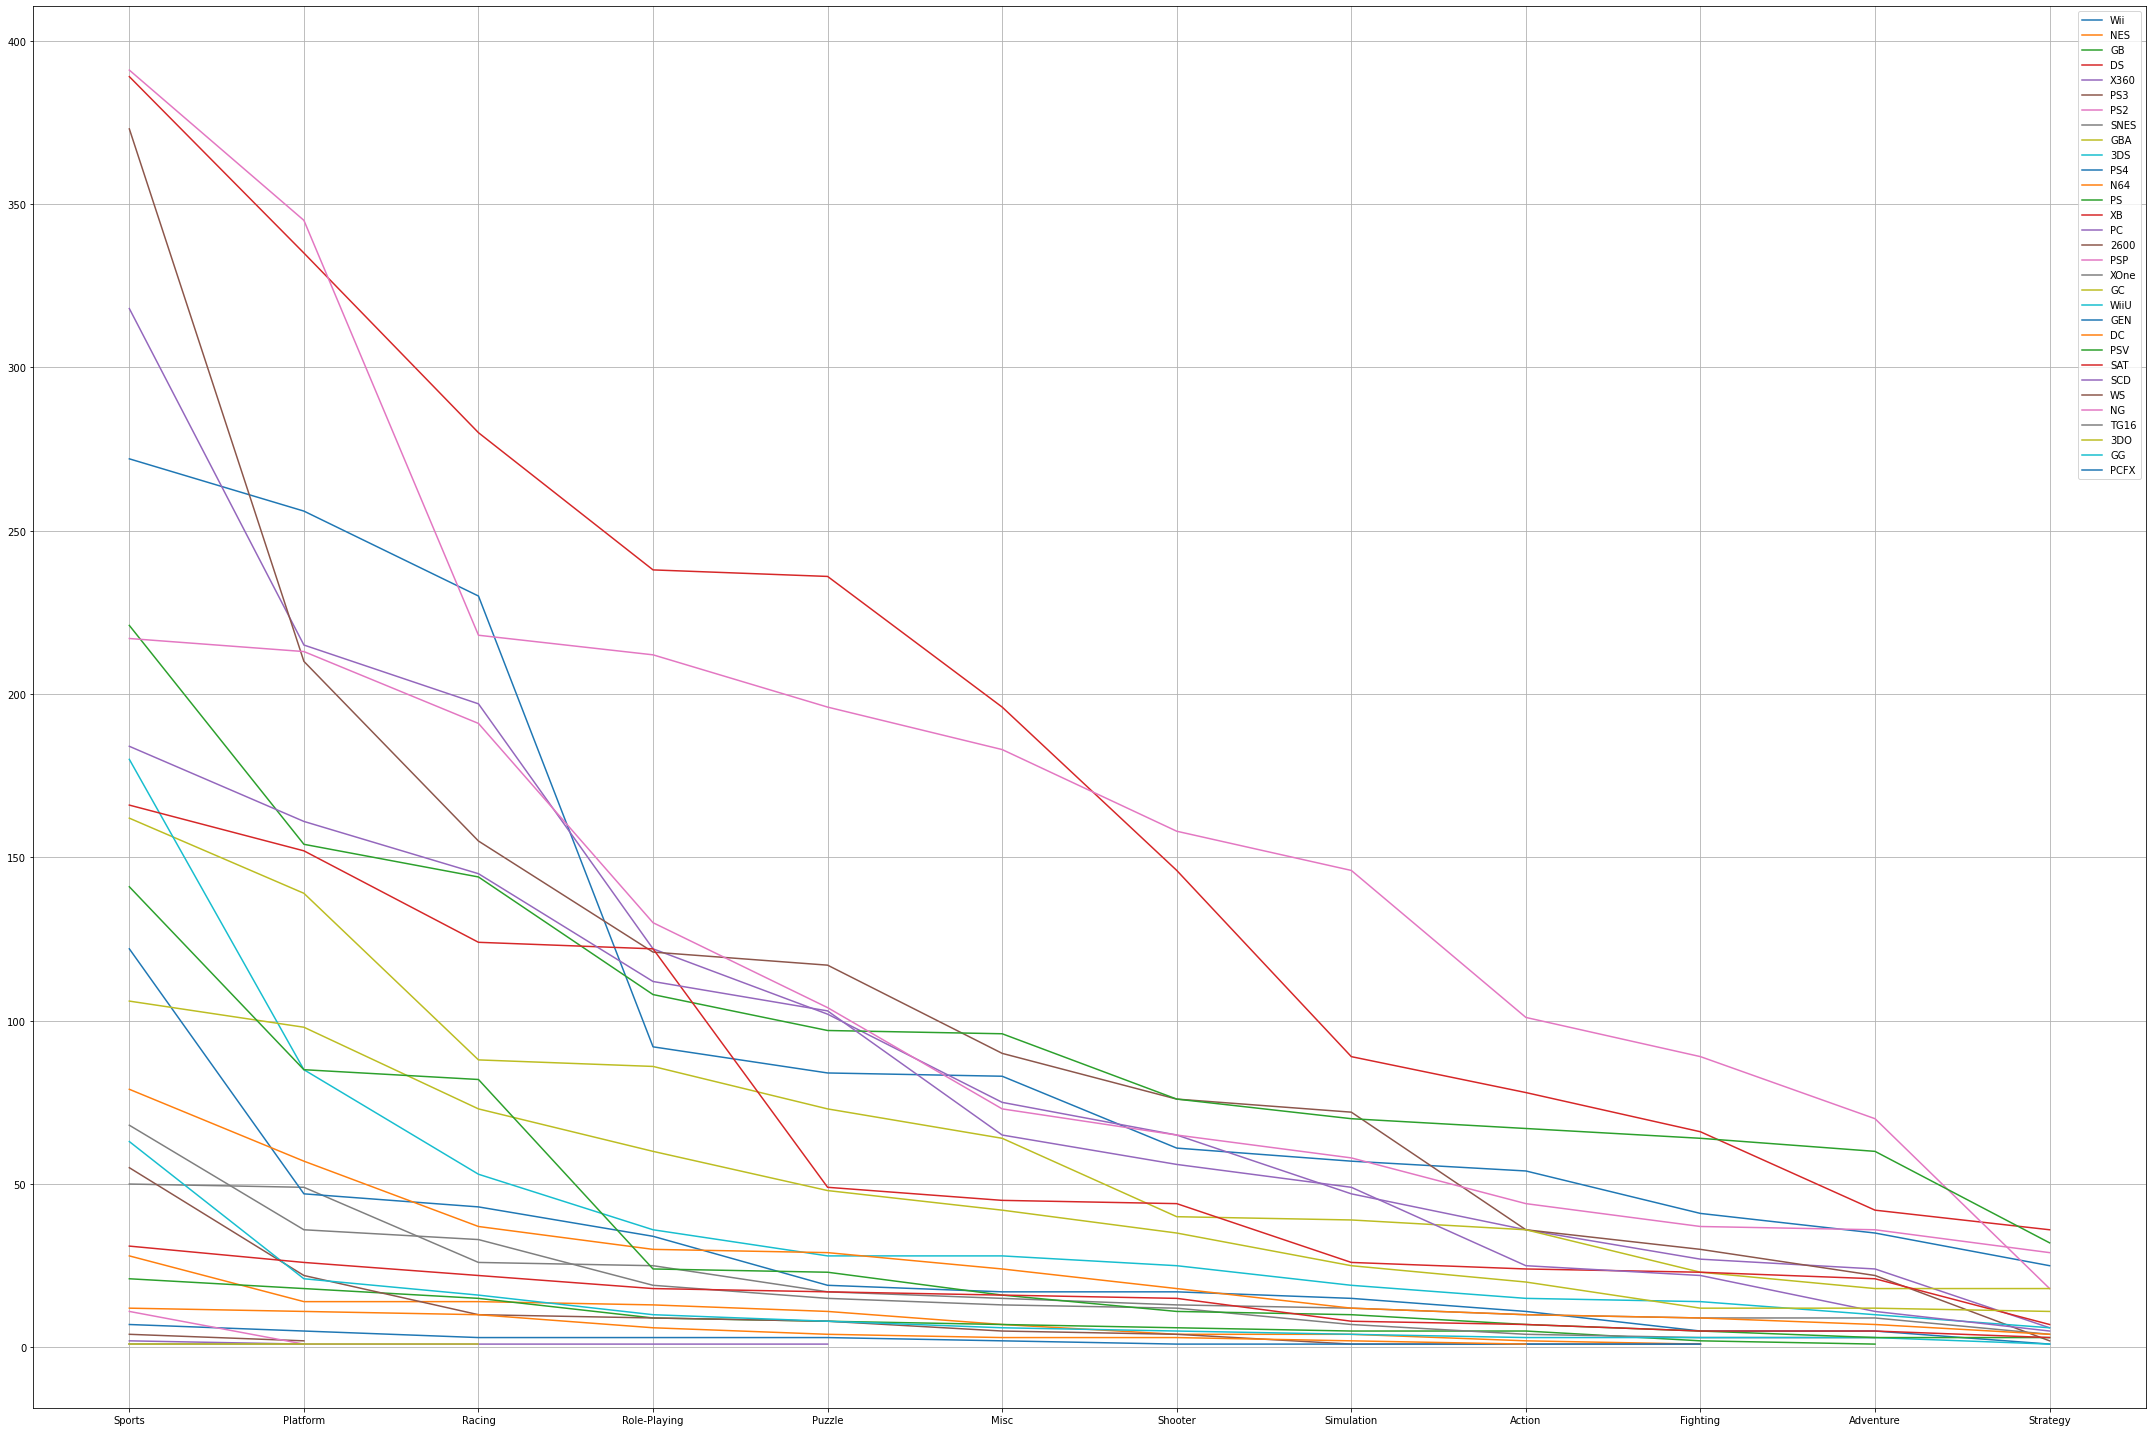

In [24]:
for i in df_games['Platform'].unique():
    df_games['Genre'][df_games['Platform'] == i].value_counts().plot(kind='line', label=i, figsize=(30, 20), grid=True)

plt.legend()
plt.xticks(np.arange(12), tuple(df_games['Genre'].unique()))
plt.tight_layout()
plt.show()

# Regressions

## Linear Regression

### Let's start with the Europe.

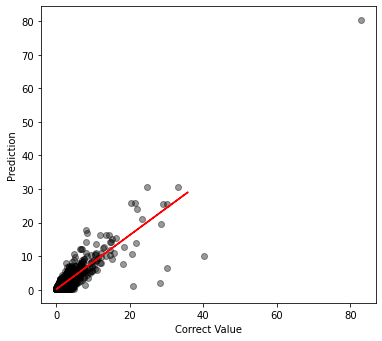

In [25]:
from sklearn.model_selection import train_test_split

y = df_games.iloc[:,-1]

X = df_games.iloc[:,6:7]
from sklearn import linear_model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
plt.figure(figsize=(6,12))

plt.subplot(2, 1, 1)
plt.scatter(x=y_train, y=y_pred_train, c="black", alpha=0.4)

a = np.polyfit(y_train, y_pred_train, 1)
p = np.poly1d(a)
plt.plot(y_test,p(y_test),"red")
plt.xlabel('Correct Value')
plt.ylabel('Prediction')
plt.show()

### Continue with the Japan.

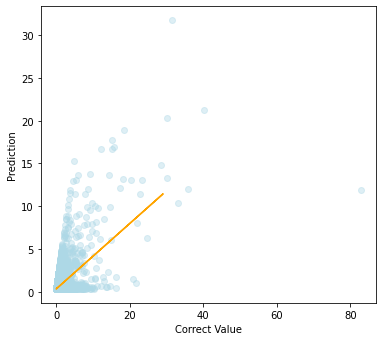

In [26]:
X = df_games.iloc[:,7:8]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
plt.figure(figsize=(6,12))

plt.subplot(2, 1, 1)
plt.scatter(x=y_train, y=y_pred_train, c="lightblue", alpha=0.4)

a = np.polyfit(y_train, y_pred_train, 1)
p = np.poly1d(a)
plt.plot(y_test,p(y_test),"orange")
plt.xlabel('Correct Value')
plt.ylabel('Prediction')
plt.show()

### And the last one is North America.

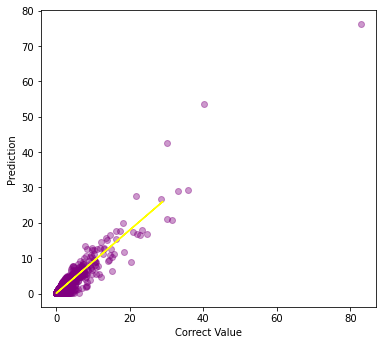

In [27]:
X = df_games.iloc[:,5:6]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
plt.figure(figsize=(6,12))

plt.subplot(2, 1, 1)
plt.scatter(x=y_train, y=y_pred_train, c="purple", alpha=0.4)

a = np.polyfit(y_train, y_pred_train, 1)
p = np.poly1d(a)
plt.plot(y_test,p(y_test),"yellow")
plt.xlabel('Correct Value')
plt.ylabel('Prediction')
plt.show()

## Random Forest Regression

### North America

In [28]:
from sklearn.ensemble import RandomForestRegressor

X = df_games.iloc[:,5:6]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

rfr = RandomForestRegressor(n_estimators = 10)
rfr.fit(X_train, y_train)
y_predrfr = rfr.predict(X_test)
print("Accuracy of train set:", rfr.score(X_train, y_train))
print("Accuracy of test set:", rfr.score(X_test, y_test))
print(r2_score(y_test,y_predrfr))

Accuracy of train set: 0.9347358141422275
Accuracy of test set: 0.844422175219727
0.844422175219727


###   Europe

In [29]:
X = df_games.iloc[:,6:7]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

ranfor = RandomForestRegressor(n_estimators = 10)
ranfor.fit(X_train, y_train)
y_predranfor = ranfor.predict(X_test)
print("Accuracy of train set:", ranfor.score(X_train, y_train))
print("Accuracy of test set:", ranfor.score(X_test, y_test))
print(r2_score(y_test,y_predranfor))

Accuracy of train set: 0.8484562455027951
Accuracy of test set: 0.6435044237753569
0.6435044237753569


###  Japan

In [30]:
X = df_games.iloc[:,7:8]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(X_train, y_train)
y_predrfr = rfr.predict(X_test)
print("Accuracy of train set:", rfr.score(X_train, y_train))
print("Accuracy of test set:", rfr.score(X_test, y_test))
print(r2_score(y_test,y_predrfr))

Accuracy of train set: 0.5491075308082521
Accuracy of test set: 0.19536825149214943
0.19536825149214943
